# Unsupervised classification

C:\Users\TeM\AppData\Local\Temp\ipykernel_21452\2033333342.py:89: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\TeM\AppData\Local\Temp\ipykernel_21452\2033333342.py:91: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


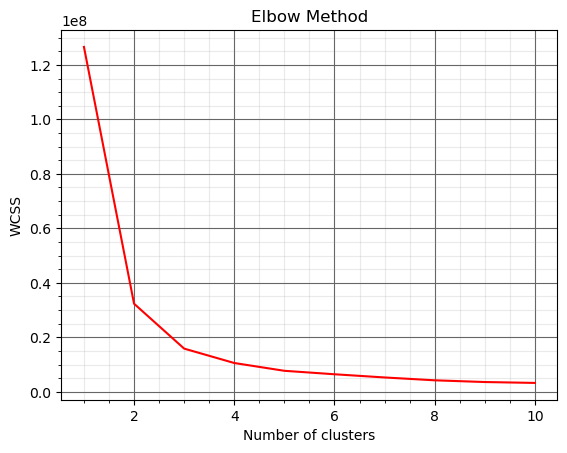

C:\Users\TeM\AppData\Local\Temp\ipykernel_21452\2033333342.py:41: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\TeM\AppData\Local\Temp\ipykernel_21452\2033333342.py:43: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


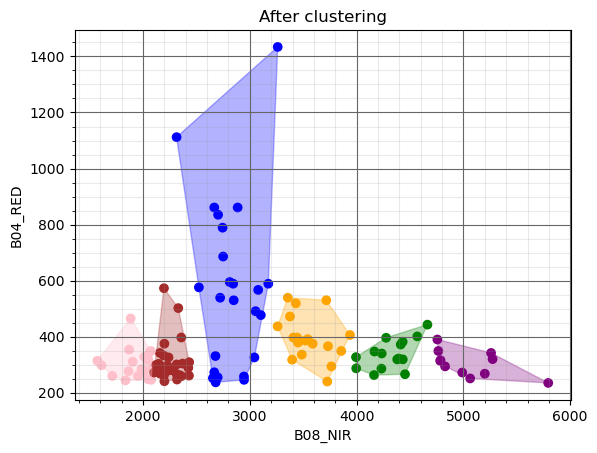

In [35]:
# From: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
# Nice plots: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py
# See: https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489

# Import modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull

# List of named colors for Mathplotlib
COLORS = ["blue","orange","green","purple","brown","pink","olive","cyan","gold","orchid"]
MAX_NR_OF_CLUSTERS = 10

# File with input data
INPUT_FILE = 'data_files/landuse_samples_training.csv' 

# Function to plot the clusters in different colors with cluster centre
def plot_clusters(df_in,  nr_of_clusters_in):

    # Define the colormap to plot
    color_list = []
    for i in df.cluster.unique():
        color_list.append(COLORS[i])
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", color_list)
  
    # Get coliumns to plot
    X = df_in[[df_in.columns[0], df_in.columns[1]]].to_numpy()

    # Set title and labels
    plt.title('After clustering')
    plt.xlabel(df_in.columns[0])
    plt.ylabel(df_in.columns[1])

    # Plot ploints
    plt.scatter(X[:, 0], X[:, 1], c=df_in['cluster'], cmap=cmap)

    # Set grid
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    # Plot the cluster centre
    plot_centre = False
    if plot_centre :
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')

    # Draw enclosure 
    for i in df.cluster.unique():

        # Get points from cluster
        points = df[df.cluster == i][[df_in.columns[0], df_in.columns[1]]].values

        # Get convex hull
        hull = ConvexHull(points)
        
        # Get x and y coordinates and repeat last point to close the polygon
        x_hull = np.append(points[hull.vertices,0],
                        points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                        points[hull.vertices,1][0])

        # Plot shape
        plt.fill(x_hull, y_hull, alpha=0.3, c=color_list[i])

    # Plot graph
    plt.show()

# Import data
df = pd.read_csv(INPUT_FILE)
X = df[[df.columns[0], df.columns[1]]].to_numpy()

# Use elbow method to find optimal number of clusters
wcss = []
for i in range(1, MAX_NR_OF_CLUSTERS + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, color='red')

# Set labels and title
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Set grid
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Show plot
plt.show()

# Ask for number of clusters to plot
ask_for_input = True
while ask_for_input:
    nr_of_clusters = int(input("Give number of clusters to plot between 1 and 8"))
    if nr_of_clusters > 0 and nr_of_clusters < 9 :
        ask_for_input = False

# Categorize clusters
kmeans = KMeans(n_clusters=nr_of_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X)
plot_clusters(df, nr_of_clusters)

